In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
DATA_FOLDER = os.path.join("..", "input", "gene-expression/")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_theme(style="darkgrid")
np.random.seed(42)


In [3]:
le = LabelEncoder()

In [4]:
train_data = pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\FLP\\data_set_ALL_AML_train.csv")
test_data = pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\FLP\\data_set_ALL_AML_independent.csv")
labels = pd.read_csv("C:\\Users\\pooja\\OneDrive\\Desktop\\FLP\\actual.csv")

In [5]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [7]:
print(f"Train data has {train_data.isna().sum().sum()} NAs")
print(f"Test data has {test_data.isna().sum().sum()} NAs")

Train data has 0 NAs
Test data has 0 NAs


In [8]:
cols_train = [col for col in train_data.columns if "call" in col]
cols_test = [col for col in test_data.columns if "call" in col]
train_data.drop(cols_train, axis=1, inplace=True)
test_data.drop(cols_test, axis=1, inplace=True)

In [9]:
train_data = train_data.T
test_data = test_data.T

In [10]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [11]:
train_data.columns = test_data.iloc[1].values
train_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)
test_data.columns = test_data.iloc[1].values
test_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)

In [12]:
train_data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [13]:
train_data["patient"] = train_data.index.values
test_data["patient"] = test_data.index.values

In [14]:
train_data = train_data.astype("int32")
test_data = test_data.astype("int32")

In [15]:
labels["cancer"] = le.fit_transform(labels["cancer"])
train_data = pd.merge(train_data, labels, on="patient")
test_data = pd.merge(test_data, labels, on="patient")

In [16]:
train_data["cancer"].value_counts()

cancer
0    27
1    11
Name: count, dtype: int64

In [17]:
test_data["cancer"].value_counts()

cancer
0    20
1    14
Name: count, dtype: int64

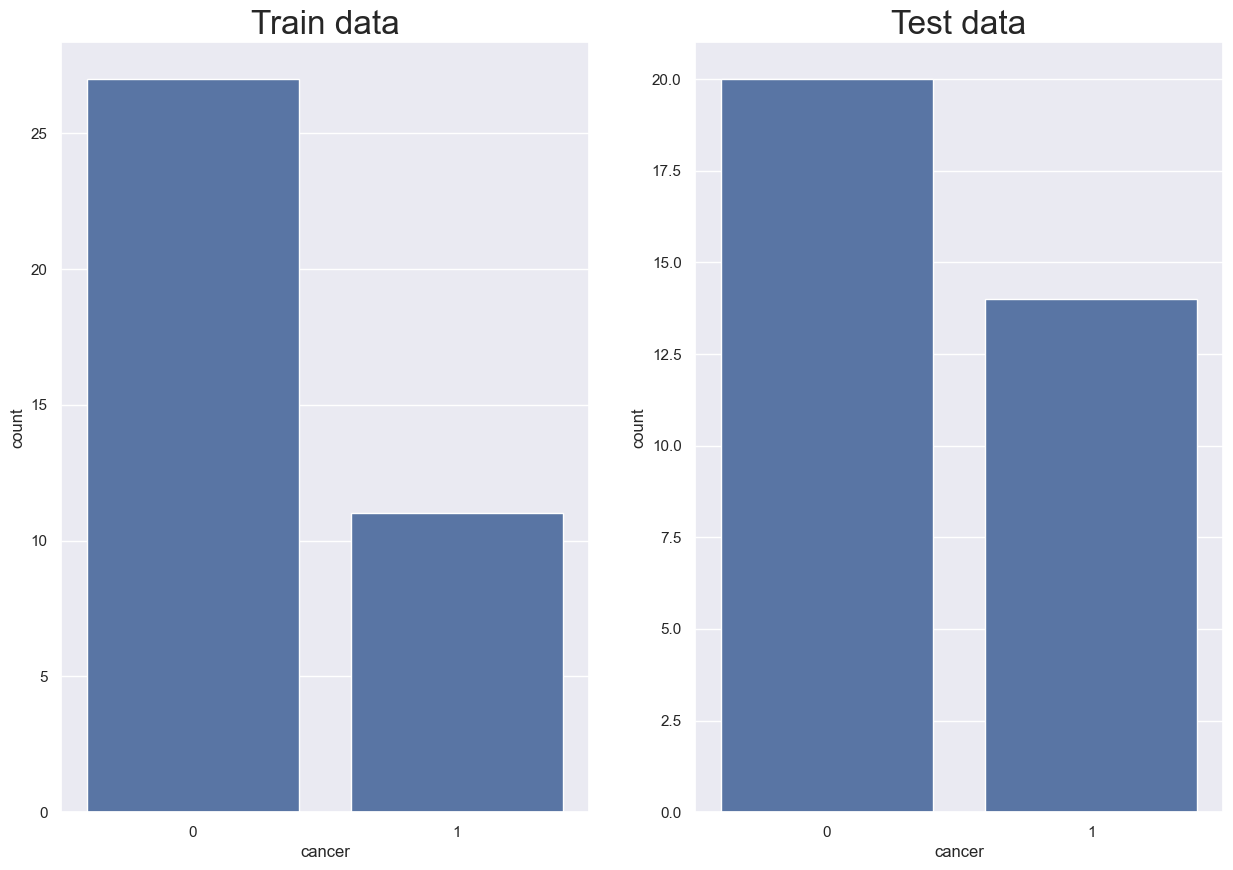

In [18]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data, ax=axs[0])
axs[0].set_title("Train data", fontsize=24)
sns.countplot(x="cancer", data=test_data, ax=axs[1])
axs[1].set_title("Test data", fontsize=24)
plt.show()

In [19]:
upsampled_data = random.sample(train_data.query("cancer == 1")["patient"].index.to_list(), k=8, )

In [20]:
upsampled_data


[37, 28, 36, 31, 30, 29, 27, 35]

In [21]:
train_data_upsampled = pd.concat([train_data, train_data.iloc[upsampled_data, :]])

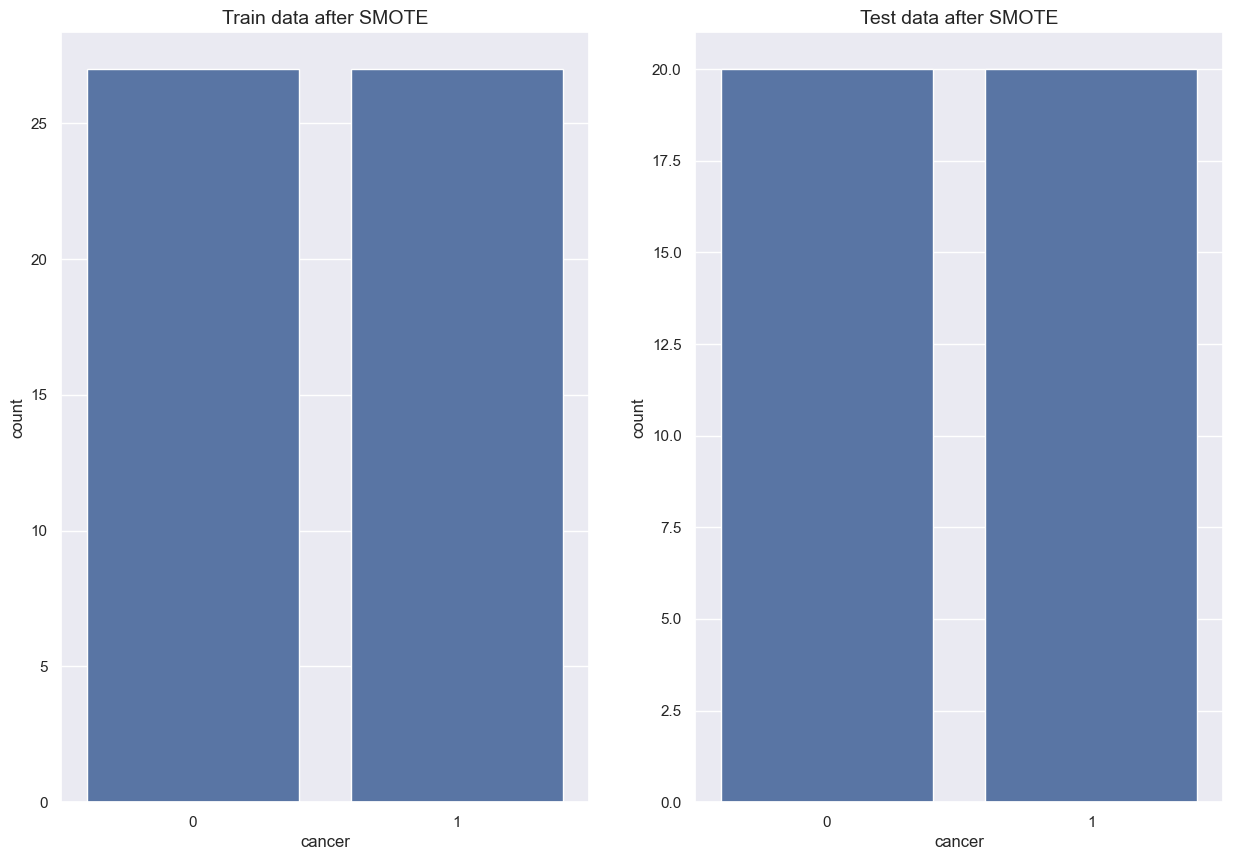

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train = train_data_upsampled.drop(columns=["patient", "cancer"])
y_train = train_data_upsampled["cancer"]
X_test = test_data.drop(columns=["patient", "cancer"])
y_test = test_data["cancer"]

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

fig, axs = plt.subplots(1, 2)
sns.countplot(x=y_train_balanced, ax=axs[0])
axs[0].set_title("Train data after SMOTE", fontsize=14)
sns.countplot(x=y_test_balanced, ax=axs[1])
axs[1].set_title("Test data after SMOTE", fontsize=14)
plt.show()

In [23]:
X_train = train_data_upsampled.drop(columns=["patient", "cancer"])
y_train = train_data_upsampled["cancer"]
X_test = test_data.drop(columns=["patient", "cancer"])
y_test = test_data["cancer"]

In [24]:
# Features scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [25]:
reduced_train = PCA().fit_transform(X_train_scaled)
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(train_data_upsampled)

KMeans(n_clusters=2, n_init=20)

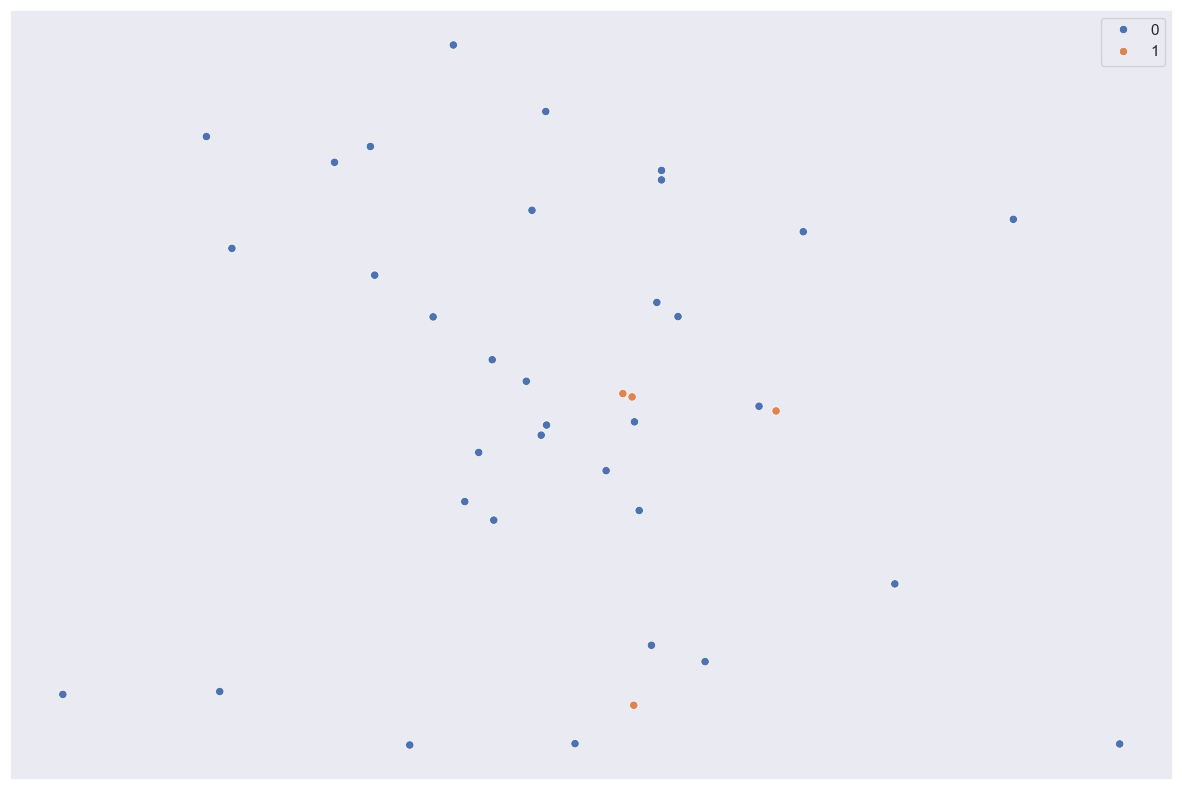

In [26]:
sns.scatterplot(x=reduced_train[0], y=reduced_train[1], hue=kmeans.labels_)
plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
cancer_labels = train_data_upsampled["cancer"].map({0: le.classes_[0], 1: le.classes_[1]}).values
patient_labels = np.array(list(map(str, train_data_upsampled["patient"].values))).astype("object") + "_" + cancer_labels

Iteration 1:
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Training Accuracy: 0.9782608695652174
Test Accuracy: 0.9411764705882353


Iteration 2:
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Training Accuracy: 0.9782608695652174
Test Accuracy: 0.9411764705882353


Iteration 3:
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Training Accuracy: 0.9782608695652174
Test Accuracy: 0.9411764705882353




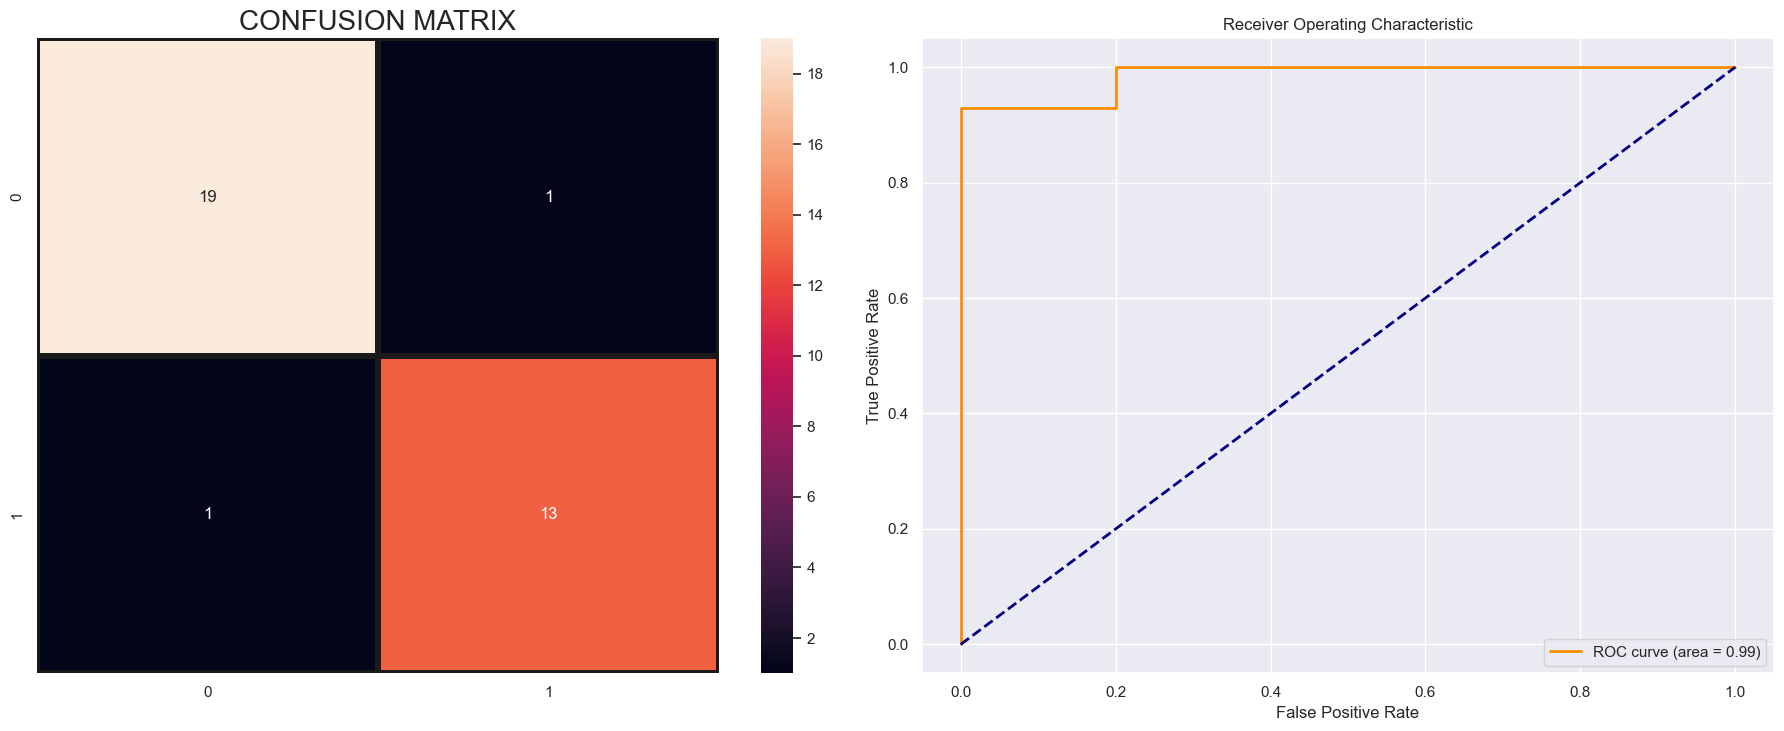

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

logreg_classifier = LogisticRegression(random_state=42)
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

num_iterations = 3

reduced_train_size = 0.5 

for iteration in range(1, num_iterations + 1):
    print(f"Iteration {iteration}:")
    X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train_scaled, y_train, train_size=reduced_train_size, random_state=42)

    grid_search_logreg = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid_logreg, cv=5, scoring='accuracy')
    grid_search_logreg.fit(X_train_sampled, y_train_sampled)

    print("Best Hyperparameters:", grid_search_logreg.best_params_)

    best_logreg_model = grid_search_logreg.best_estimator_
    y_train_pred_logreg = best_logreg_model.predict(X_train_scaled)

    train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
    print("Training Accuracy:", train_accuracy_logreg)

    y_test_pred_logreg = best_logreg_model.predict(X_test_scaled)

    test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
    print("Test Accuracy:", test_accuracy_logreg)
    
    print("\n" + "="*50 + "\n")

plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_test_pred_logreg), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, best_logreg_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Best Training Accuracy: 0.9555555555555555
Test Accuracy: 0.9117647058823529


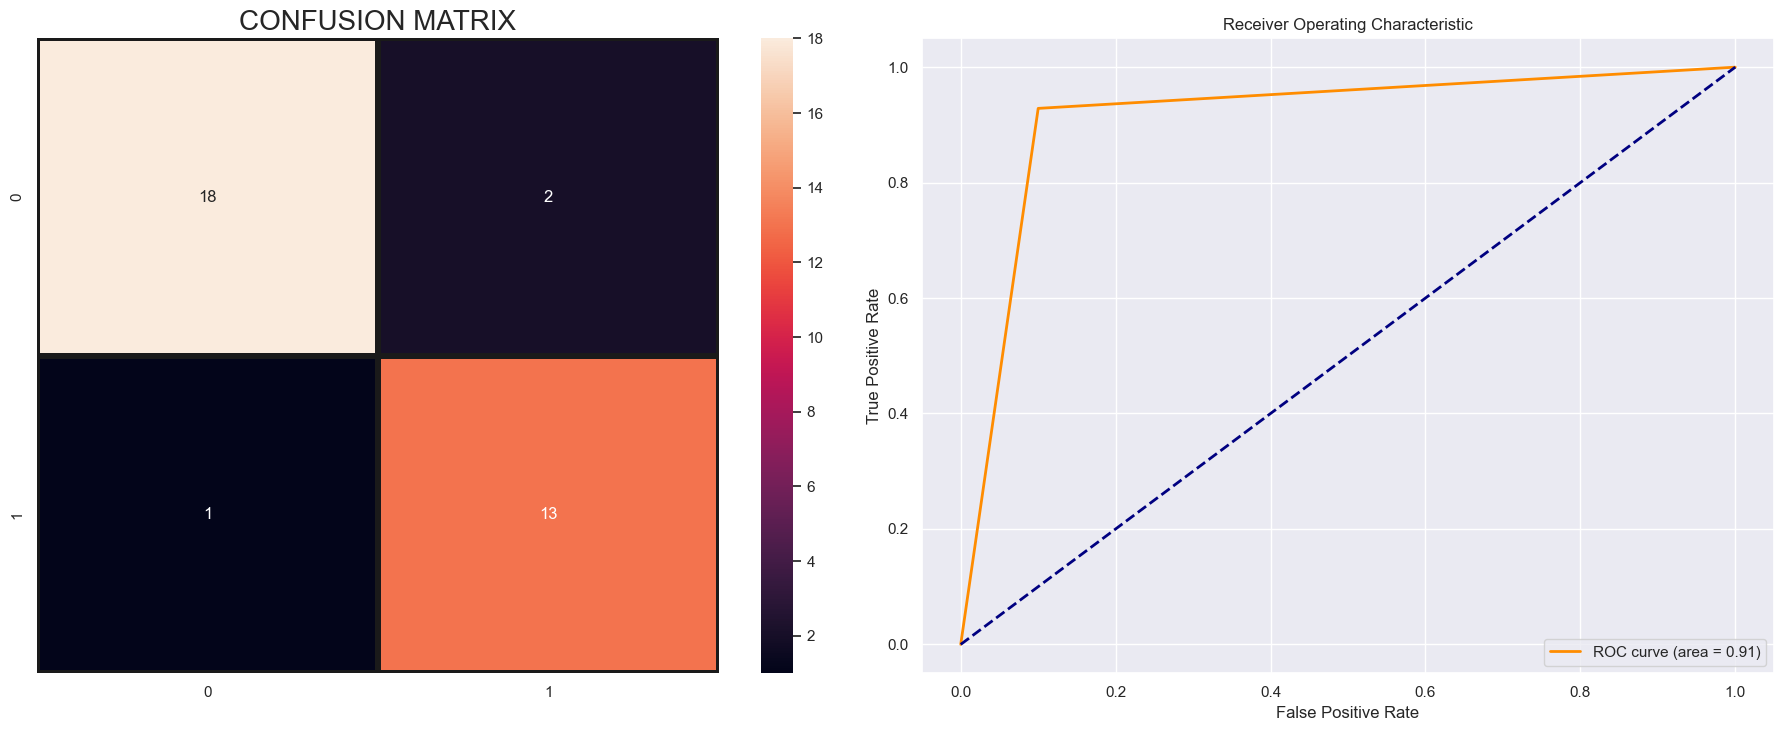

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Features scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    dt_classifier, 
    param_distributions=param_dist, 
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", random_search.best_params_)

best_train_accuracy = random_search.best_score_
print("Best Training Accuracy:", best_train_accuracy)

best_dt_model = random_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


# Generate confusion matrix
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

# Generate ROC curve
plt.subplot(222)
fpr, tpr, thresholds = roc_curve(y_test, best_dt_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()